## Загрузим нужные библиотеки

In [52]:
import os
from datetime import datetime
import time
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


%matplotlib inline

In [2]:
# df = pd.read_csv("data/train_dataset_train.csv", nrows = 10000)
df = pd.read_csv("data/train_dataset_train.csv")

# df_add = pd.read_csv("subway.csv")

## Рассмотрим датасет по ближе

In [3]:
# df_add.head(3)

In [4]:
df[df['station_nm']=='Угрешская']

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
396,397,B8D44EC96AF20E4EFC3E4167ECBD226C,30 дней Пригород ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-12 05:30:18,800.050000,6018
501,502,4BAF114EFA4E10521319B9FB6F17B0E5,365 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-12 05:30:47,838.566667,14019
1630,1631,D0C858CD308CE6AFEE526F78CF6CE985,30 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-12 05:42:29,821.333333,11005
4221,4222,AFF358FB2170F8A517A44E10AFC6F576,30 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-12 06:01:02,935.850000,14030
4527,4528,ECAB8CCB81CA2A929BAF053EF865581B,30 дней Пригород ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-12 06:02:36,830.716667,14006
...,...,...,...,...,...,...,...,...,...,...,...,...
1086560,1086561,A59AA7906E6EE3D55CFACED2FB41F1A2,30 дней СК студента,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-18 18:42:17,55.316667,14011
1087150,1087151,EB91D0324EB065956BD689E4264BF38F,30 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-18 18:55:06,268.866667,14020
1089702,1089703,D241176CD4E4D5B081148F73F7E71022,30 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-18 20:22:33,103.466667,14009
1089706,1089707,C783E30A4B2F4CB4E88CFB3EC1383F45,30 дней ЕДИНЫЙ ТК,2153,Угрешская МЦК,14028,Угрешская,14,Московское центральное кольцо,2022-09-18 20:22:43,103.400000,14009


In [5]:
# df_add.info()

In [6]:
# df_add[df_add['start_station_id']==3010]['all_stations_nm'].iloc[0]

In [7]:
# filtered_data = df_add[df_add['start_station_id']=='Молодёжная']
# filtered_data

In [8]:
# df_add.columns

Посмотрим на распределение двух основных величин 

<AxesSubplot:>

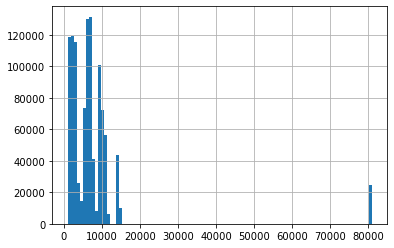

In [9]:
df["label"].hist(bins = 100)


<AxesSubplot:>

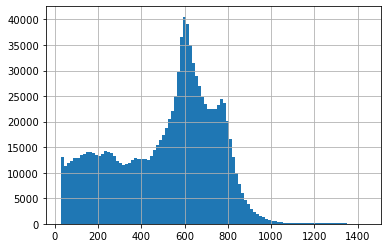

In [10]:
df["time_to_under"].hist(bins = 100)

<AxesSubplot:>

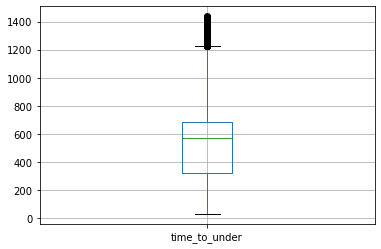

In [11]:
df.boxplot(column=['time_to_under'])



Найдем наиболее популярную станцию

In [12]:
df["label"].value_counts()

3002     17272
6008     15541
1022     13758
5010     13122
7022     13080
         ...  
13002       24
13003       23
13006       17
13005       14
13004        7
Name: label, Length: 276, dtype: int64

In [13]:
df["entrance_nm"].value_counts()

Щёлковская ( Северный )        17810
Кузьминки (Восточный)          13530
Некрасовка (Первый)            12205
Славянский бульвар (Восток)    11963
Новогиреево (Восточный)        11949
                               ...  
ВВЦ                               16
Ул. Эйзенштейна                   10
Ул. Ак. Королёва                   9
Телецентр                          8
Мнёвники (Второй)                  4
Name: entrance_nm, Length: 426, dtype: int64

In [14]:
df[df["label"] == int(df["label"].value_counts().index[0])].head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
60,61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002
233,234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002
307,308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002
420,421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002
526,527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002


Посмотрим пустые данные

<AxesSubplot:>

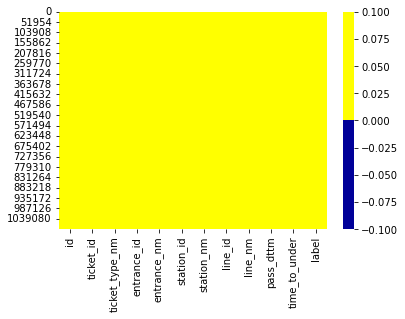

In [15]:
cols = df.columns # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Сделаем категорию **"ticket_type_nm"** раноговой 

In [16]:
df["ticket_type_nm"].value_counts()

КОШЕЛЕК                                                   262499
30 дней ЕДИНЫЙ ТК                                         177041
Социальная карта москвича                                 127022
30 дней                                                   117064
90 дней ЕДИНЫЙ ТК                                          58071
30 дней СК студента                                        48658
60 поездок ЕДИНЫЙ ТК                                       46542
30 дней Пригород ТК                                        45381
СК студента 30 дней                                        39395
ББК                                                        29674
30 дней СК учащегося                                       24307
365 дней ЕДИНЫЙ ТК                                         20859
СК учащегося 30 дней                                       16933
Социальная карта жителя Моск. области                      15551
90 дней                                                    12817
Пропуск FacePay          


Кажется нет четкой зависимости между категорией билета и временем между заходи на станцию

In [17]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"].astype('category').cat.codes
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

In [18]:
# sns.jointplot(x = "ticket_type_nm", y = 'time_to_under', data = df, kind = 'reg')

Видоизменим категорию **"pass_dttm"**  

In [19]:
df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

Добавим новый столбец в датсет и взглянем на то что у нас получилось

In [20]:
# df.head(3)

In [21]:
# plt.rcParams['figure.figsize']=(15,15)

# corr = df.corr()
# g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [22]:
X = df.drop(["id", "ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under"], axis = 1)
y = df[["time_to_under", "label"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,ticket_type_nm,entrance_id,station_id,line_id,day,hours
882227,3,412,10005,10,17,8
948359,3,408,10009,10,17,15
131332,6,1006,9005,9,12,10
888247,3,220,8005,8,17,8
686932,5,279,6007,6,16,6
...,...,...,...,...,...,...
110268,5,115,2017,2,12,9
259178,6,213,5003,5,13,8
131932,38,2263,15002,15,12,10
671155,51,2183,10015,10,15,19


In [25]:
# X

In [26]:
# y_train

## Обучение модели

Для станции 

In [64]:
clf = RandomForestClassifier(n_estimators=300, random_state=10, n_jobs=7, verbose=1, max_depth=15)

In [65]:
clf.fit(X_train, y_train["label"])

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   11.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   53.1s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomForestClassifier(max_depth=15, n_estimators=300, n_jobs=7,
                       random_state=10, verbose=1)

In [60]:
# X.columns.values

In [61]:
# feature_imp = pd.Series(clf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
# feature_imp

Для времени

In [31]:
reg = RandomForestRegressor(n_estimators=200, random_state=2, n_jobs=7, verbose=1, max_depth=15)

In [32]:
reg.fit(X_train, y_train["time_to_under"])

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   14.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:  1.1min finished


RandomForestRegressor(max_depth=15, n_estimators=200, n_jobs=7, random_state=0,
                      verbose=1)

In [33]:
# feature_imp = pd.Series(reg.feature_importances_,index=X.columns.values).sort_values(ascending=False)
# feature_imp

## Оценка точности

In [ ]:
from sklearn.metrics import recall_score, r2_score


pred_class = clf.predict(X_test)
pred_reg = reg.predict(X_test)
score_recall = recall_score(y_test["label"], pred_class , average='macro')
score_r2 = r2_score(y_test["time_to_under"], pred_reg)
score = 0.5 * score_recall +  0.5 * score_r2
print(f'Общий скор: {score}')
print(f'recall: {score_recall}')
print(f'r2: {score_r2}')

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.9s


## Создание тестового датасета

In [35]:
df_test = pd.read_csv("data/test_dataset_test.csv")

In [36]:
df_test["ticket_type_nm"] = pd.Categorical(df_test["ticket_type_nm"])
df_test["ticket_type_nm"].astype('category').cat.codes
df_test["ticket_type_nm"] = df_test["ticket_type_nm"].cat.codes

In [37]:
df_test["day"] = df_test.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df_test["hours"] = df_test.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

In [38]:
X = df_test.drop(["id", "ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm"], axis = 1)

In [39]:
# feature_imp = pd.Series(clf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
# feature_imp

In [40]:
# X

In [41]:
pred_class = clf.predict(X)
pred_reg = reg.predict(X)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   20.4s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:  1.5min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    1.4s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    1.5s finished


In [42]:
indexes = df_test['id'].to_numpy()

In [43]:
len(indexes)

561890

In [44]:
len(pred_reg)

561890

In [45]:
len(pred_class)

561890

In [46]:
submit_df = pd.DataFrame([[id_, time_to_under, label] for id_, time_to_under, label in zip(indexes, pred_reg, pred_class)], columns=['id','time_to_under', 'label'])

In [47]:
# submit_df = submit_df.sort_values(['id'])
# submit_df.head(5)

In [48]:
now_time = datetime.now().strftime("%d_%m_%Y %H_%M")

In [49]:
os.mkdir(now_time)

In [55]:
submit_df.to_csv(f"{now_time}/submit_{now_time}.csv", index=False)

In [57]:
with open(f'{now_time}/parametrs.txt', 'w') as file:
    file.write('clf_params()')
    file.write(json.dumps(clf.get_params(), indent=4))
    file.write('\n'+'reg_params()')
    file.write(json.dumps(reg.get_params(), indent=4))

with open(f'{now_time}/results.txt', 'w') as file:
    file.write(f'Score_recall (clf): {score_recall}')
    file.write('\n'+f'Score_r2 (reg): {score_r2}')
    file.write('\n'+f'Score: {score}')

Заметка:

In [54]:
now_time

'05_11_2022 18_14'